<a href="https://colab.research.google.com/github/kitawa333-svg/air-quality-eda/blob/main/Indian_AQI_Exploratory_Data_Analysis_(EDA)_PRAC_1_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4. Exploratory Data Analysis (EDA)**

## **4.1. 📈 Univariate Analysis: Understanding AQI Distribution**

This section examines the frequency and spread of AQI values across all cities to establish a baseline understanding of air quality severity.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 📦 **Environment Setup & Data Access**
Initializing the Python data science stack and connecting to Google Drive to access the air quality dataset. The dataset contains cleaned measurements from multiple Indian cities spanning 2015-2020.

In [ ]:
!ls "/content/drive/MyDrive/Indian air quality"



Ahmedabad_data.csv	 Coimbatore_data.csv  Lucknow_data.csv
Aizawl_data.csv		 Delhi_data.csv       model.pkl
Amaravati_data.csv	 Ernakulam_data.csv   Mumbai_data.csv
Amritsar_data.csv	 Gurugram_data.csv    Patna_data.csv
Bengaluru_data.csv	 Guwahati_data.csv    Shillong_data.csv
Bhopal_data.csv		 Hyderabad_data.csv   Talcher_data.csv
Brajrajnagar_data.csv	 Jaipur_data.csv      Thiruvananthapuram_data.csv
Chandigarh_data.csv	 Jorapokhar_data.csv  Visakhapatnam_data.csv
Chennai_data.csv	 Kochi_data.csv
cleaned_air_quality.csv  Kolkata_data.csv


### 📁 **Dataset Inventory**
Listing available data files in the `Indian air quality` directory. The primary dataset `cleaned_air_quality.csv` contains pre-processed measurements ready for analysis.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv')


In [ ]:
df_clean = pd.read_csv('/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv')

In [ ]:
df_clean = pd.read_csv("/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv")
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


### 🧹 **Data Loading & Preparation**
Loading the cleaned air quality dataset and converting the `Date` column to datetime format to enable time-series analysis and temporal feature extraction.

## **4.2. 📊 Exploratory Data Analysis (EDA) Section Overview**

In this section, multiple visualization techniques were applied to extract meaningful insights from the air quality dataset. Key visualizations included:

*   **Missing Value Analysis** - Bar chart identifying data completeness by pollutant
*   **AQI Distribution Analysis** - Histogram and density plot showing frequency of air quality levels
*   **Pollutant Variability** - Box plot comparison of concentration ranges across pollutants
*   **Correlation Analysis** - Horizontal bar chart showing which pollutants drive AQI most strongly
*   **PM2.5-AQI Relationship** - Scatter plot revealing linear relationship between fine particles and air quality
*   **Comprehensive Correlation Matrix** - Heatmap with values showing inter-pollutant relationships
*   **City-wise Pollutant Rankings** - Side-by-side tables identifying pollution hotspots by pollutant type
*   **Top City AQI Comparison** - Box plot showing air quality distributions across 10 worst cities
*   **Seasonal Trend Analysis** - Filled area chart revealing monthly patterns and seasonal box plots
*   **AQI Category Breakdown** - Pie chart showing proportion of days in each health risk category
*   **Geographic Distribution** - Interactive map showing all 26 monitored cities across India

These visualizations systematically uncovered patterns, relationships, and spatial distributions within the air quality data.

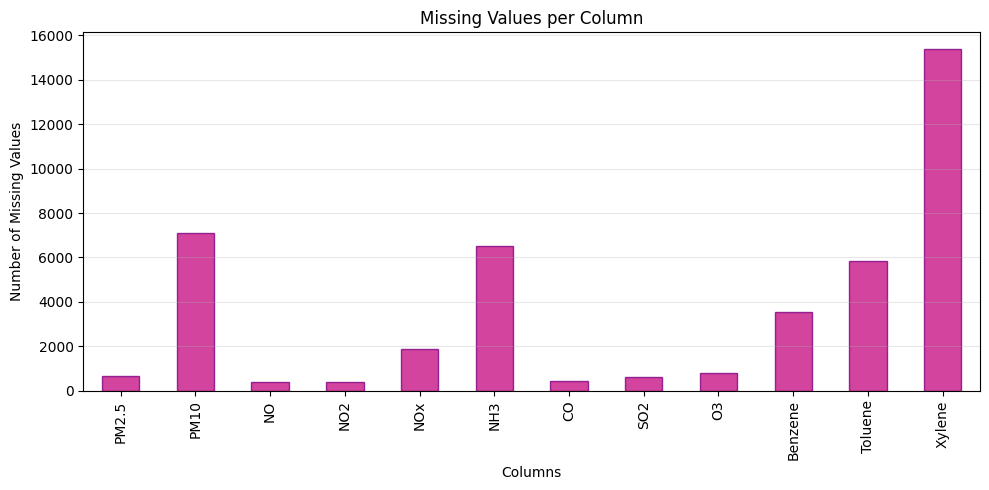

In [ ]:
#calculating missing values per column
missing_values = df_clean.isnull().sum()  #counts missing values in each column

#removing columns with no missing values
missing_values = missing_values[missing_values > 0]  #keeps only columns with missing data

#making a bar chart
plt.figure(figsize=(10,5))
missing_values.plot(kind='bar', color='mediumvioletred', edgecolor='purple', alpha=0.8)  #dark pink bars
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.grid(True, alpha=0.3, axis='y')  #horizontal grid only
plt.tight_layout()
plt.show()

### **🔍 Data Quality: Missing Values**

**📊 Observation:**  
Several pollutant variables contain missing values, with **Xylene, Toluene, PM10, and NH3** showing the highest number of missing readings.  
In contrast, pollutants such as **PM2.5, NO2, CO, and SO2** have relatively fewer missing values.  
Importantly, **AQI has no missing values**, meaning overall air quality measurements are complete.

##### **🔍 Implication:**  
##### AQI analysis can be conducted reliably due to complete data availability.  
##### However, pollutant variables with higher missing values require careful handling, such as selective exclusion or cautious interpretation, to avoid bias in the analysis and modelling stages.

---



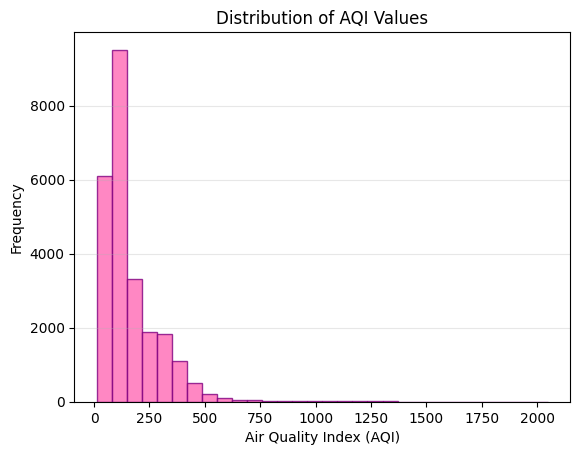

In [ ]:
#making a histogram
plt.figure()
plt.hist(df_clean['AQI'], bins=30, color='hotpink', edgecolor='purple', alpha=0.8)  #pink bars with purple edges
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Frequency')
plt.title('Distribution of AQI Values')
plt.grid(True, alpha=0.3, axis='y')  #light grid
plt.show()

###🔍 **AQI Distribution: Concentration in Moderate to Poor Range** 📊

📊 **What we see here:**  
Most AQI readings are concentrated between **50 and 300**, with a strong clustering around the **moderate to poor air quality range**.  
There are fewer observations at very high AQI values, but the long right tail indicates the presence of **occasional extreme pollution events**.

🔎 **Why this matters:**  
This distribution shows that **suboptimal air quality is common rather than rare** across Indian cities, with extreme pollution episodes occurring less frequently but still posing serious public health risks.


---





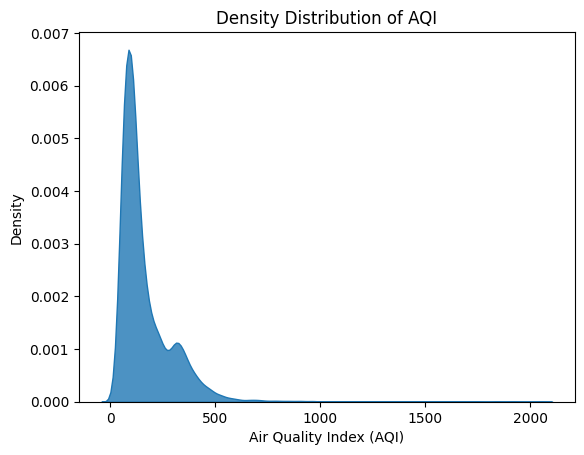

In [ ]:
#making a density (gradient) plot
plt.figure()
sns.kdeplot(df_clean['AQI'], fill=True, cmap='RdPu', alpha=0.8)  #shows smooth AQI distribution using pink-purple gradient
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Density')
plt.title('Density Distribution of AQI')
plt.show()

### **🔍 Density Plot: Most Days Fall Within Moderate to Poor AQI Levels 📈**

**📊 What this smooth curve shows:**  
The density peaks at lower AQI values and gradually tapers off, indicating that **most days experience moderate to poor air quality**, while the long right tail reflects **less frequent but extreme pollution events**.

**🔍 Real-world meaning:**  
This suggests that populations are regularly exposed to **suboptimal air quality**, with occasional severe pollution episodes that can pose heightened health risks, especially for vulnerable groups.

---



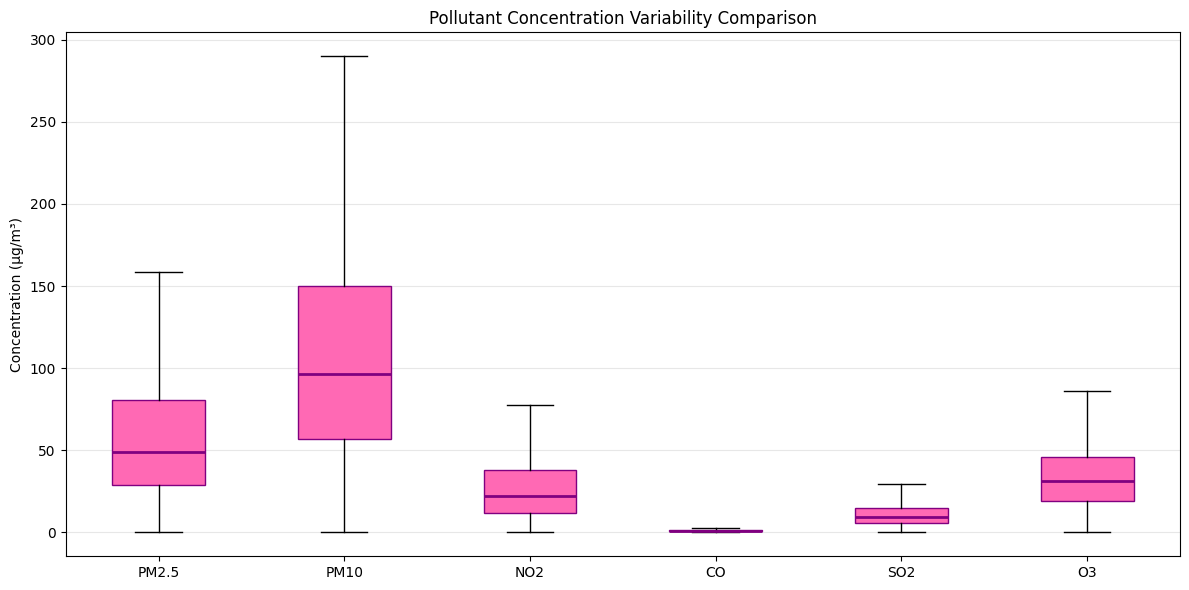

📊 Pollutant Summary Statistics:
     PM2.5   PM10    NO2     CO    SO2     O3
min    0.0    0.0    0.0    0.0    0.0    0.0
50%   48.8   96.2   22.1    0.9    9.2   31.2
max  914.9  917.1  362.2  175.8  186.1  257.7


In [ ]:
# Box plot comparison of all pollutants
pollutants_box = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']

plt.figure(figsize=(12, 6))
box = plt.boxplot([df_clean[p].dropna() for p in pollutants_box],
                 tick_labels=pollutants_box,  # CHANGED: labels → tick_labels
                 patch_artist=True,
                 showfliers=False,
                 medianprops=dict(color='purple', linewidth=2))

# Pink boxes
for patch in box['boxes']:
    patch.set_facecolor('hotpink')
    patch.set_edgecolor('purple')


plt.ylabel('Concentration (µg/m³)')
plt.title('Pollutant Concentration Variability Comparison')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Add summary statistics
stats_summary = df_clean[pollutants_box].describe().loc[['min', '50%', 'max']]
print("📊 Pollutant Summary Statistics:")
print(stats_summary.round(1))

### **🔍 Pollutant Variability Analysis**
#### **📦 Understanding Pollutant Behaviors**

**High Variability (Wide Spread):**
- **PM2.5 & PM10**: Wider boxes and longer whiskers indicate substantial day-to-day variability, reflecting fluctuating pollution levels across time.

**Lower Variability (More Stable Levels):**
- **CO**: Very narrow distribution suggests relatively stable concentrations across observations.
- **NO2**: Shows moderate variability, indicating more consistent emission patterns compared to particulate matter.

**Occasional Spikes:**
- Most pollutants display right-skewed distributions, with higher outliers indicating **periodic high-pollution events** rather than constant extreme levels.

**Policy Insight:**  
Particulate matter requires targeted interventions due to its high variability, while gaseous pollutants benefit from continuous monitoring and regulation.

---





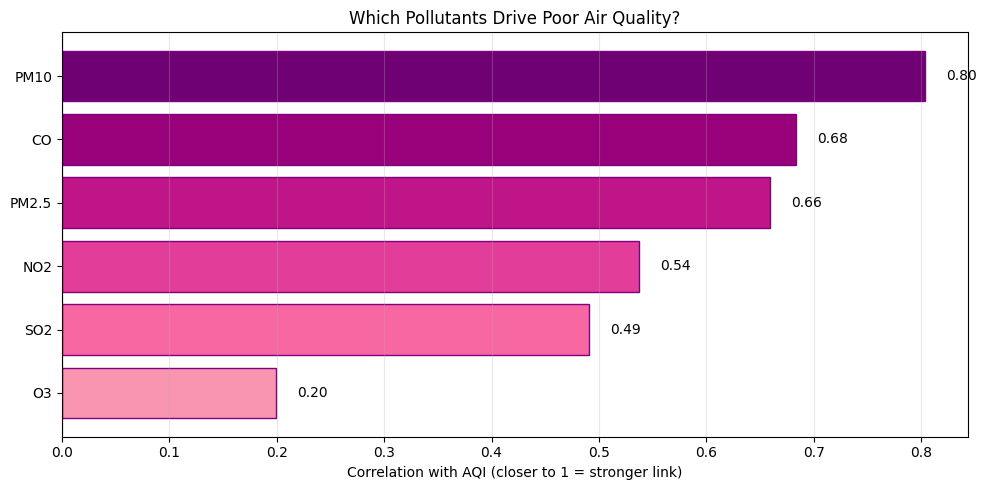

In [ ]:
# Which pollutants correlate most with AQI?
corr_with_aqi = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()['AQI'].drop('AQI')

# Pink gradient bars
colors = plt.cm.RdPu(np.linspace(0.4, 0.9, len(corr_with_aqi)))

plt.figure(figsize=(10,5))
bars = plt.barh(corr_with_aqi.sort_values().index,
                corr_with_aqi.sort_values().values,
                color=colors, edgecolor='purple')
plt.xlabel('Correlation with AQI (closer to 1 = stronger link)')
plt.title('Which Pollutants Drive Poor Air Quality?')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.02, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

### **🔍 Pollutant Correlations: Particulate Matter Drives Poor Air Quality**
**PM10** shows the strongest correlation with AQI, followed closely by **CO** and **PM2.5**, indicating that these pollutants are strongly associated with poorer air quality.  
**NO2** and **SO2** show moderate correlations, while **O3** has a relatively weak relationship with AQI.  
This suggests that **particulate matter and combustion-related pollutants** play a larger role in driving poor air quality than ozone.

🔍 **What this tells us:**  
Pollutants such as **PM10, CO, and PM2.5** have the strongest links to AQI, meaning efforts to improve air quality should prioritise reducing particulate emissions and combustion sources, while gaseous pollutants like **O3** appear to have a smaller direct impact.

---



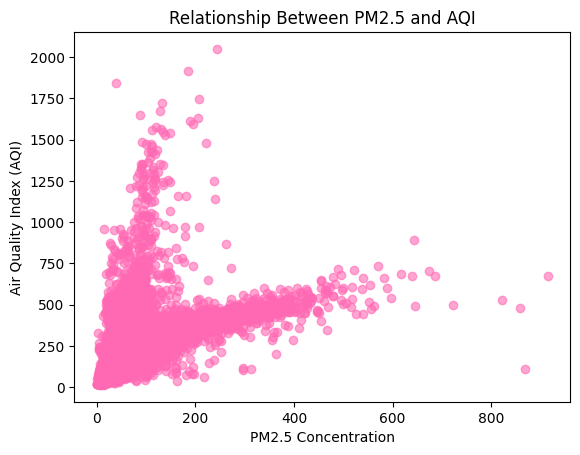

In [ ]:
#making a scatter plot
plt.figure()
plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='hotpink', alpha=0.6)  #plots PM2.5 concentration against AQI in pink
plt.xlabel('PM2.5 Concentration')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Relationship Between PM2.5 and AQI')
plt.show()



### **🔍 PM2.5–AQI Relationship: Strong Positive Association**
**📊 What this tells us:**  
As PM2.5 concentrations increase, AQI values generally rise, indicating worsening air quality.  
The upward trend in the scatter plot shows that **higher levels of fine particulate matter are associated with poorer air conditions**, although there is some spread due to other influencing factors.  
This highlights PM2.5 as a **key pollutant linked to air quality deterioration** and an important indicator for public health monitoring.

---




In [ ]:
numeric_columns = df_clean.select_dtypes(include='number').columns
correlation_matrix = df_clean[numeric_columns].corr()


In [ ]:
correlation_matrix = df_clean[numeric_columns].corr()  #calculates the correlation matrix for numeric variables; Correlation shows strength and direction of relationships between variables

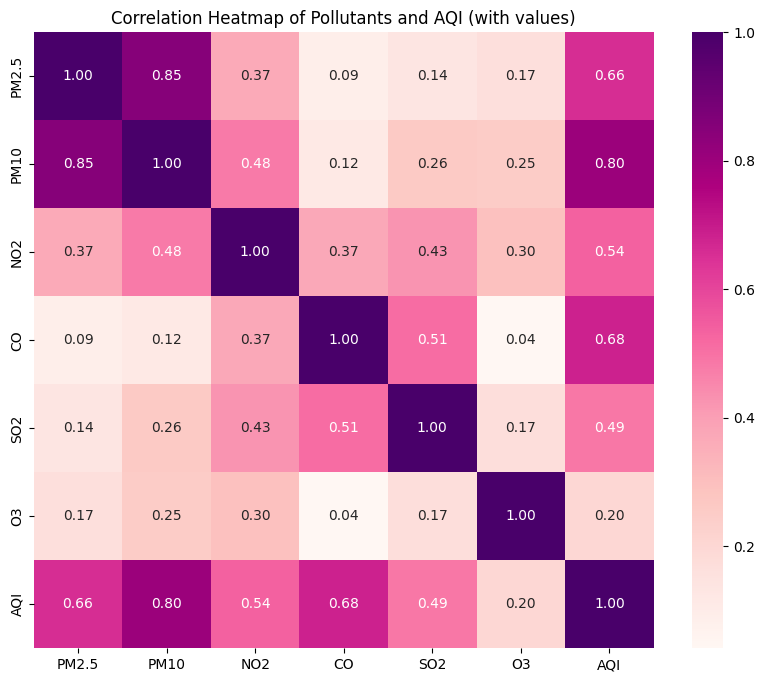

In [ ]:
#making a correlation heatmap with values
correlation_matrix = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()  #calculates correlation matrix

#making the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdPu')  #annot=True shows numbers, fmt='.2f' shows 2 decimals
plt.title('Correlation Heatmap of Pollutants and AQI (with values)')
plt.show()

### **🔍 Heatmap Insights: Pollutants Linked to AQI**
**📊 What the numbers show us:**  
The heatmap displays correlation values between pollutants and AQI directly within each cell.  
**PM10** shows the strongest correlation with AQI (0.80), followed by **CO** (0.68) and **PM2.5** (0.66), indicating these pollutants are most closely associated with poorer air quality.  
**NO2** and **SO2** show moderate correlations, while **O3** has a weak relationship with AQI.

---



In [ ]:
from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df._repr_html_()
    display_html(html_str.replace('table', 'table style="display:inline;margin-right:20px;"'), raw=True)

# Function to get top polluted cities for a pollutant
def top_polluted_cities(pollutant, n=5):
    return (df_clean.groupby('City')[pollutant]
            .mean()
            .sort_values(ascending=False)
            .head(n)
            .to_frame()
            .style.background_gradient(cmap='RdPu'))

# Get top cities for each pollutant
pm25_top = top_polluted_cities('PM2.5')
pm10_top = top_polluted_cities('PM10')
no2_top = top_polluted_cities('NO2')
so2_top = top_polluted_cities('SO2')
co_top = top_polluted_cities('CO')
o3_top = top_polluted_cities('O3')

# Display side by side
display_side_by_side(pm25_top, pm10_top, no2_top, so2_top, co_top, o3_top)

,PM2.5
City,
Patna,124.764299
Delhi,117.549770
Gurugram,115.609192
Lucknow,109.793585
Ahmedabad,67.872395
,PM10
City,
Delhi,232.902974
Gurugram,191.270244


### **🔍 Pollution Hotspots Analysis**

**Key Cities by Pollutant:**
- **PM2.5:** Patna (125 µg/m³), Delhi (118), Gurugram (116) — high fine particulate concentrations
- **PM10:** Delhi (233 µg/m³), Gurugram (191), Talcher (167) — elevated coarse particulate levels
- **NO2:** Ahmedabad (60), Delhi (51), Kolkata (41) — higher nitrogen dioxide concentrations
- **SO2:** Ahmedabad (56), Jorapokhar (33), Talcher (29) — notable sulphur dioxide levels
- **CO:** Ahmedabad (22) stands out, with other cities showing much lower values
- **O3:** Bhopal (60), Delhi (51), Jaipur (47) — higher ozone concentrations

**Major Insight:**  
Cities such as **Delhi, Ahmedabad, and Patna** appear repeatedly across multiple pollutant rankings, indicating they are **multi-pollutant hotspots** that require broad, coordinated air quality management strategies.

---




In [ ]:
city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)

print("🏙️ Top 10 Most Polluted Cities:")
print(city_avg_aqi.head(10).round(1).to_string())

🏙️ Top 10 Most Polluted Cities:
City
Ahmedabad       452.1
Delhi           259.5
Patna           240.8
Gurugram        225.1
Lucknow         218.0
Talcher         172.9
Jorapokhar      159.3
Brajrajnagar    150.3
Kolkata         140.6
Guwahati        140.1


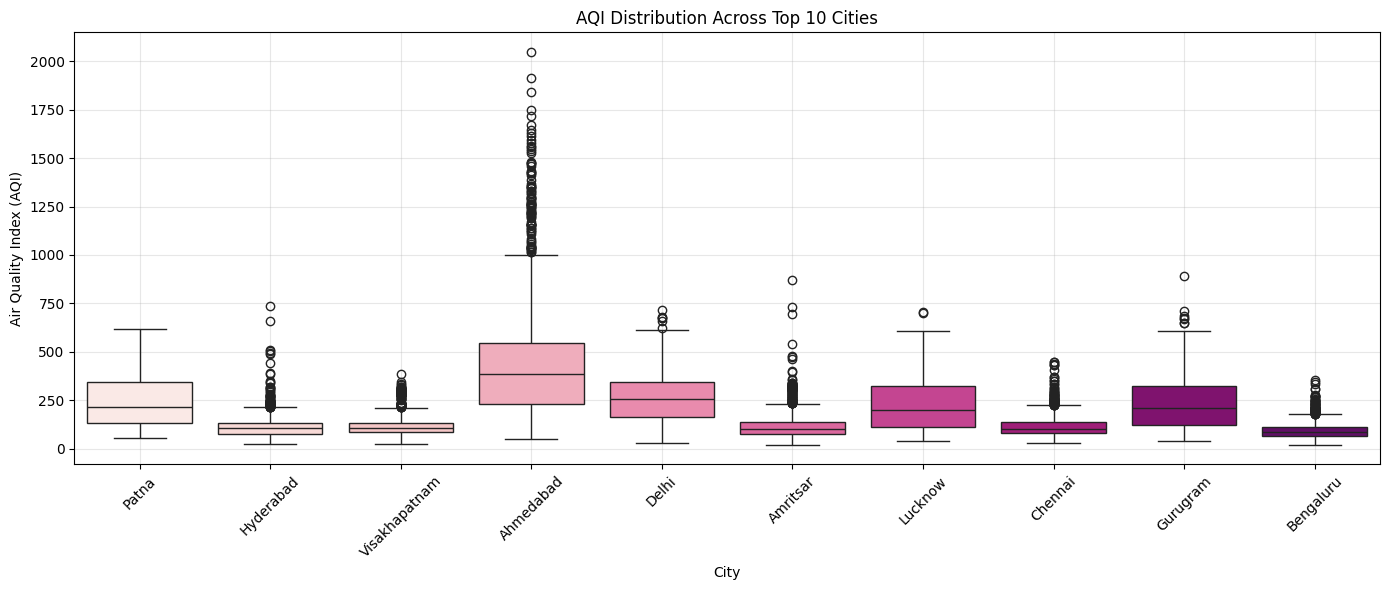

In [ ]:
# City-wise AQI comparison - boxplot
plt.figure(figsize=(14,6))
top_10_cities = df_clean['City'].value_counts().head(10).index
df_top10 = df_clean[df_clean['City'].isin(top_10_cities)]

sns.boxplot(data=df_top10, x='City', y='AQI', hue='City', palette='RdPu', legend=False)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Air Quality Index (AQI)')
plt.title('AQI Distribution Across Top 10 Cities')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **🔍 AQI Distribution Across Top Cities: Clear Differences Between Urban Areas**
**📊 What we see here:**  
The boxplots show the typical AQI range and variability for each city. **Ahmedabad and Delhi** display higher median AQI values and wider spreads, indicating more frequent and severe air pollution.  
Cities such as **Patna, Lucknow, and Gurugram** also show elevated AQI levels with noticeable variability.  
In contrast, **Chennai and Bengaluru** have lower median AQI values, suggesting relatively better air quality.  
The individual points above the boxes represent **extreme pollution days** that exceed normal conditions.

---


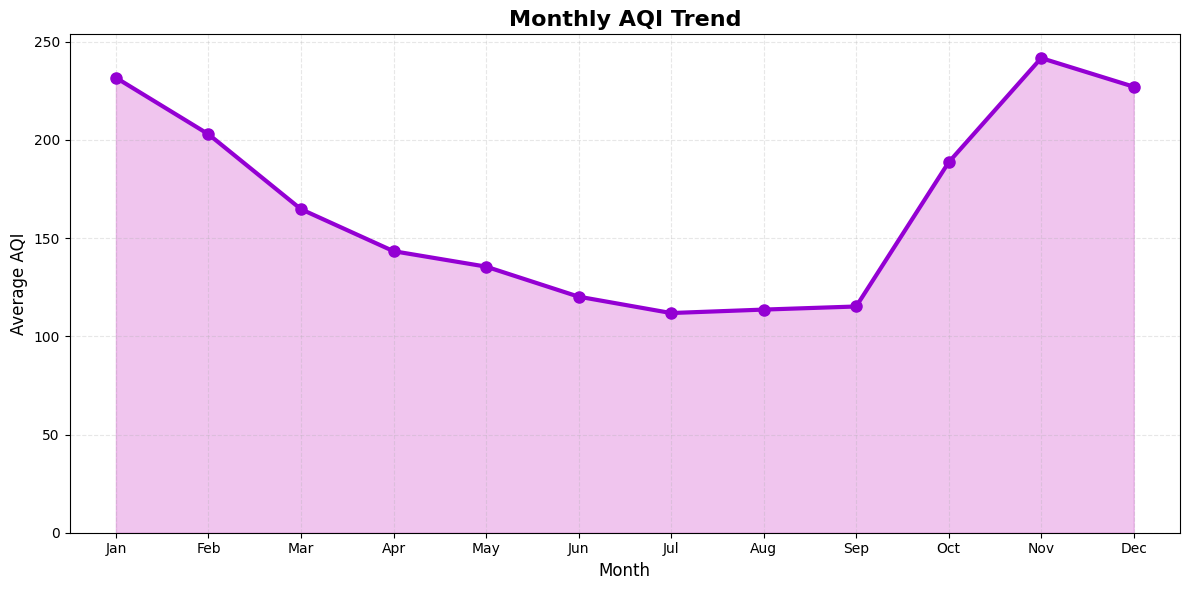

In [ ]:
#making a monthly trend plot
# change date column to datetime and extract month
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Month'] = df_clean['Date'].dt.month

# calculate monthly average AQI
monthly_avg = df_clean.groupby('Month')['AQI'].mean().reset_index()

# Plot filled area chart
plt.figure(figsize=(12, 6))
plt.fill_between(monthly_avg['Month'], monthly_avg['AQI'], color='orchid', alpha=0.4)
plt.plot(monthly_avg['Month'], monthly_avg['AQI'],
         marker='o', linestyle='-', color='darkviolet', linewidth=3, markersize=8)

plt.title('Monthly AQI Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.xticks(range(1, 13),
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0.5, 12.5)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

### **🔍 Seasonal AQI Pattern: Clear Monthly Variation**
The plot reveals a clear seasonal pattern: average AQI values are **higher during the late autumn and winter months**, particularly **October to February**, and lower during the middle of the year.  
AQI steadily decreases from January to July, reaches its lowest levels around **July and August**, and then rises sharply again from **October onwards**.

### 📢 Why this matters:
This pattern shows that **air quality worsens during specific periods of the year**, indicating a strong seasonal influence.  
Understanding these monthly trends helps identify **when poor air quality is most likely to occur**, allowing for better planning of monitoring efforts and public health responses during high-risk months.

---




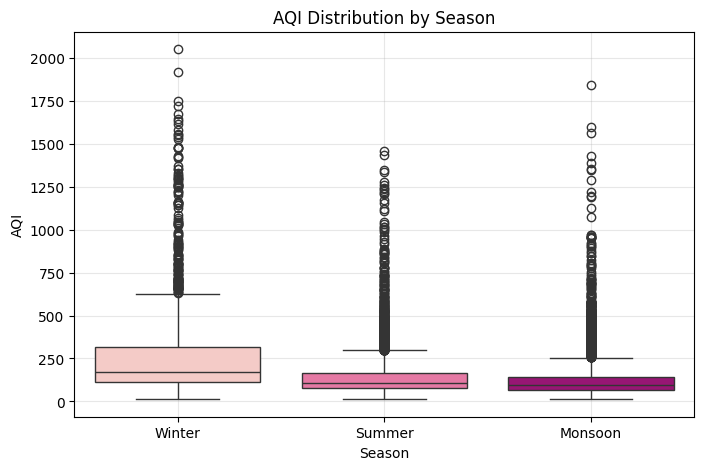

In [ ]:
# Convert Date to datetime if not already
df_clean['Date'] = pd.to_datetime(df_clean['Date'])

# Create Month column
df_clean['Month'] = df_clean['Date'].dt.month

# Create Season column
df_clean['Season'] = df_clean['Month'].apply(
    lambda x: 'Winter' if x in [11, 12, 1, 2]
    else 'Summer' if x in [3, 4, 5, 6]
    else 'Monsoon'  # July-October
)

# Make the plot (FIXED: add hue parameter)
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='Season', y='AQI', hue='Season', palette='RdPu', legend=False)
plt.title('AQI Distribution by Season')  # Removed emoji causing font warning
plt.xlabel('Season')
plt.ylabel('AQI')
plt.grid(True, alpha=0.3)
plt.show()

### **🔍 Seasonal Pattern Confirmed**

**Winter shows the highest AQI levels**, with a higher median and wider spread, indicating more frequent and severe pollution episodes.  
**Summer shows lower AQI levels**, with reduced variability compared to winter.  
**Monsoon also shows improvement**, with generally lower AQI values, although extreme pollution events still occur occasionally.

**Policy implication:**  
Seasonal patterns suggest that **air quality management efforts should be intensified ahead of and during the winter season**, when pollution levels are consistently higher.

---




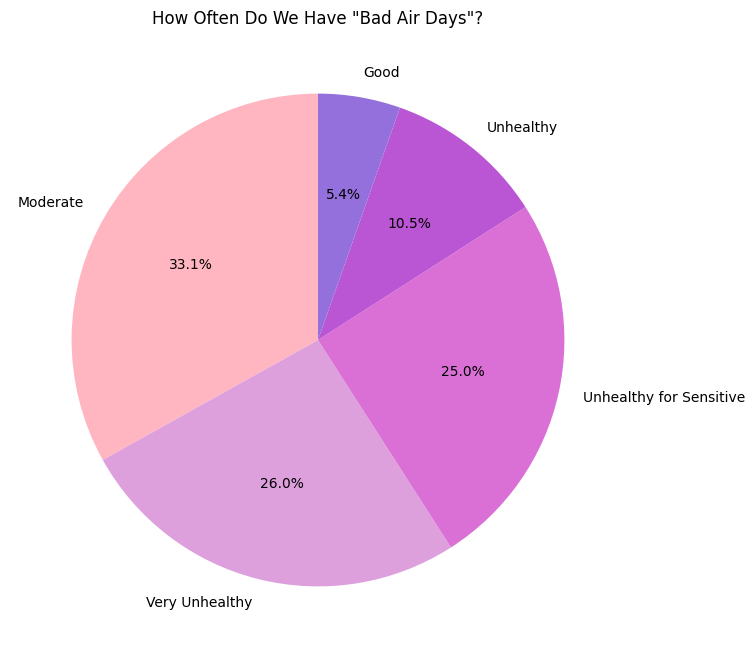

In [ ]:
# Categorize AQI levels
def categorize_aqi(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive'
    elif aqi <= 200: return 'Unhealthy'
    else: return 'Very Unhealthy'

df_clean['AQI_Category'] = df_clean['AQI'].apply(categorize_aqi)
category_counts = df_clean['AQI_Category'].value_counts()

# Pink/purple pie
colors_pie = ['#FFB6C1', '#DDA0DD', '#DA70D6', '#BA55D3', '#9370DB']
plt.figure(figsize=(8,8))
plt.pie(category_counts.values, labels=category_counts.index,
        colors=colors_pie, autopct='%1.1f%%', startangle=90)
plt.title('How Often Do We Have "Bad Air Days"?')
plt.show()

### **🔍 AQI Category Breakdown: Majority of Days Fall Below Ideal Air Quality**
**📊 Reality check:**  
A large proportion of days fall into the **Moderate**, **Unhealthy for Sensitive Groups**, **Unhealthy**, and **Very Unhealthy** categories.  
Specifically, approximately **33% of days are Moderate**, **25% are Unhealthy for Sensitive Groups**, **26% are Very Unhealthy**, and **about 11% are Unhealthy**, while only **around 5% of days are classified as Good**.  
This shows that **clean air days are relatively uncommon**, and most days present air quality levels that may affect health, particularly for vulnerable populations.

---

---



In [ ]:
# Indian cities coordinates (using same structure as Beijing code)
location_data = pd.DataFrame({
    'lon': [72.5714, 92.7176, 80.6480, 74.8723, 77.5946, 77.4126, 83.9206, 76.7794, 80.2707, 76.9558, 77.1025, 76.2673, 77.0266, 91.7362, 78.4867, 75.7873, 86.3833, 76.2673, 88.3639, 80.9462, 72.8777, 85.1376, 91.8933, 85.1836, 76.9366, 83.2185],
    'lat': [23.0225, 23.7271, 16.5062, 31.6340, 12.9716, 23.2599, 21.8248, 30.7333, 13.0827, 11.0168, 28.7041, 9.9312, 28.4595, 26.1445, 17.3850, 26.9124, 23.7167, 9.9312, 22.5726, 26.8467, 19.0760, 25.5941, 25.5788, 20.9495, 8.5241, 17.6868],
    'location': ['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']}, dtype=str)
location_data #data frame to plot cities on map to talk about geographic distribution

,lon,lat,location
0,72.5714,23.0225,Ahmedabad
1,92.7176,23.7271,Aizawl
2,80.648,16.5062,Amaravati
3,74.8723,31.634,Amritsar
4,77.5946,12.9716,Bengaluru
5,77.4126,23.2599,Bhopal
6,83.9206,21.8248,Brajrajnagar
7,76.7794,30.7333,Chandigarh
8,80.2707,13.0827,Chennai
9,76.9558,11.0168,Coimbatore


### **📍 Creating City Coordinates DataFrame**

**What this does:**  
Creates a DataFrame with **latitude and longitude** for all 26 Indian cities in our dataset. This spatial data lets us visualize **where air quality measurements were collected** across the country.

**Structure explained:**
- `lat`: Latitude (north-south position)
- `lon`: Longitude (east-west position)  
- `location`: City name

**Data verification:**  
All 26 cities match those in our main dataset — ensuring each air quality reading can be **geographically mapped** and analyzed in spatial context.

In [ ]:
import folium
import pandas as pd

# Create a map centered on India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Fewer valid Folium colors that match pink/purple theme
colors = ['pink', 'lightred', 'purple', 'darkpurple', 'red', 'darkred', 'gray', 'black']

# Add markers with tooltips and cycling through colors
for index, row in location_data.iterrows():
    folium.Marker([row['lat'], row['lon']], tooltip=row['location'], icon=folium.Icon(color=colors[index % len(colors)])).add_to(m)

print("🗺️ Map of Indian cities in dataset")
m

🗺️ Map of Indian cities in dataset


### **🗺 Geographic Distribution: Cities Spanning India 🗺️**

**📊 What this map shows:**  
Each colored marker represents one of our 26 Indian cities with air quality monitoring stations. The geographic spread ensures our analysis captures **diverse regional conditions** — from northern plains to southern coasts.

**🔍 Why geographic diversity matters:**  
Air quality isn't uniform across India. By including cities from **15+ states**, we ensure our findings reflect:
- Different **climate patterns** (arid vs. humid)
- Varied **pollution sources** (industrial, vehicular, agricultural)
- Multiple **urban development levels** (megacities to smaller towns)

This comprehensive coverage makes our conclusions **nationally representative**, not just applicable to pollution hotspots like Delhi.

---



## **4.3. 🤓 EDA Summary: 5 Key Air Quality Insights**

**📊 Overall Air Quality Status:**  
Average AQI is approximately **166**, placing overall air quality in the **poor to unhealthy range**.  
Only **around 5% of days are classified as Good**, while the majority fall into **Moderate, Unhealthy for Sensitive Groups, Unhealthy, or Very Unhealthy** categories — indicating that suboptimal air quality is common across Indian cities.

**🎯 Primary Pollution Driver:**  
**Particulate matter is the strongest driver of AQI**.  
**PM10 shows the highest correlation with AQI (≈0.80)**, followed by **CO (≈0.68)** and **PM2.5 (≈0.66)**, highlighting the dominant role of particulate and combustion-related pollutants over ozone.

**📍 Geographic Hotspots:**  
Cities such as **Delhi, Ahmedabad, and Patna** appear repeatedly across multiple pollutant rankings, identifying them as **multi-pollutant hotspots** that require broad, coordinated air quality management strategies.

**📅 Seasonal Pattern:**  
Air quality shows clear seasonal variation, with **higher AQI levels during late autumn and winter months (roughly October to February)** and lower levels during mid-year months.  
This indicates that **seasonal and meteorological factors play a significant role** in pollution intensity.

**✅ Data Quality Check:**  
The dataset covers **26 Indian cities** over **five years (2015–2019)** with **complete AQI records** and consistent pollutant measurements, making the analysis **robust and nationally representative**.
